In [1]:
# Agregar Librerías
import time #Medir tiempo
import random #Crear valores aleatorios                         
import matplotlib.pyplot as plt #Graficar
import reprlib  #Mostrar caracteres limitados

In [2]:
# Función Crear Matriz de m x n https://www.dreamincode.net/forums/topic/413327-creating-nxm-matrix-without-numpy/
def makeCostMatrix(m,n):
    return [[random.randint(100, 200) for row in range(n)] for column in range(m)]

In [3]:
# Crear Lista de Matrices y Vectores
list_mtx = [0,0,0,0]
list_vct = [0,0,0,0]

# Crear Matrices y Vectores con contenido aleatorio
for w in range(4):
  m = ((w+1)*200) # Dimensiones para filas 
  n = ((w+1)*200) # Dimensiones para columnas
  list_mtx[w] = makeCostMatrix(m,n) # Crear Matriz con contenido aleatorio
  list_vct[w] = makeCostMatrix(n,1) # Crear Vector con contenido aleatorio
  print('Matriz %s' %w) # Nombre de Matriz
  print(reprlib.repr(list_mtx[w])) # Mostrar
  row_mtx = len(list_mtx[w]) # Número de filas
  col_mtx = len(list_mtx[w][0]) # Número de columnas
  print('%s x %s' % (row_mtx,col_mtx)) # Mostrar dimensiones
  print('Vector %s' %w)  # Nombre de Vector
  print(reprlib.repr(list_vct[w])) # Mostrar
  row_vct = len(list_vct[w]) # Número de filas
  col_vct = len(list_vct[w][0]) # Número de columnas
  print('%s x %s' % (row_vct,col_vct)) # Mostrar dimensiones
  print(' ')
print('Lista de Matrices') # Mostrar listas de Matrices y Vectores
print(reprlib.repr(list_mtx))
print(reprlib.repr(list_vct))

Matriz 0
[[159, 146, 126, 200, 175, 179, ...], [199, 100, 112, 156, 159, 139, ...], [152, 154, 116, 124, 149, 114, ...], [198, 177, 139, 127, 126, 136, ...], [192, 149, 149, 169, 146, 123, ...], [156, 181, 174, 123, 123, 162, ...], ...]
200 x 200
Vector 0
[[193], [118], [184], [113], [189], [187], ...]
200 x 1
 
Matriz 1
[[200, 159, 149, 184, 137, 111, ...], [158, 200, 148, 193, 133, 197, ...], [157, 140, 146, 173, 193, 107, ...], [134, 137, 156, 187, 112, 132, ...], [136, 153, 123, 124, 165, 137, ...], [143, 111, 197, 174, 176, 159, ...], ...]
400 x 400
Vector 1
[[119], [137], [166], [118], [186], [189], ...]
400 x 1
 
Matriz 2
[[130, 125, 125, 147, 111, 110, ...], [159, 129, 125, 104, 156, 177, ...], [194, 165, 197, 137, 118, 142, ...], [125, 136, 196, 163, 184, 198, ...], [111, 175, 133, 179, 132, 182, ...], [118, 105, 122, 138, 163, 159, ...], ...]
600 x 600
Vector 2
[[131], [160], [119], [151], [137], [101], ...]
600 x 1
 
Matriz 3
[[133, 194, 118, 149, 176, 103, ...], [134, 171, 

In [4]:
# Función matriz con elementos ceros con filas y columnas específicas
def zeros_matrix(rows, cols):
    """
    Creates a matrix filled with zeros.
        :param rows: the number of rows the matrix should have
        :param cols: the number of columns the matrix should have
 
        :return: list of lists that form the matrix
    https://integratedmlai.com/basic-linear-algebra-tools-in-pure-python-without-numpy-or-scipy/
    """
    M = []
    while len(M) < rows:
        M.append([])
        while len(M[-1]) < cols:
            M[-1].append(0.0)
 
    return M

In [5]:
# Función para multiplicar dos matrices 
# Row-Major
def matrix_multiply(A, B):
    """
    Returns the product of the matrix A * B
        :param A: The first matrix - ORDER MATTERS!
        :param B: The second matrix
 
        :return: The product of the two matrices
    https://integratedmlai.com/basic-linear-algebra-tools-in-pure-python-without-numpy-or-scipy/
    """
    # Section 1: Ensure A & B dimensions are correct for multiplication
    rowsA = len(A)
    colsA = len(A[0])
    rowsB = len(B)
    colsB = len(B[0])
    if colsA != rowsB:
        raise ArithmeticError(
            'Number of A columns must equal number of B rows.')
 
    # Section 2: Store matrix multiplication in a new matrix
    C = zeros_matrix(rowsA, colsB)
    for i in range(rowsA):
        for j in range(colsB):
            total = 0
            for ii in range(colsA):
                total += A[i][ii] * B[ii][j]
            C[i][j] = total
 
    return C

In [6]:
# Se harán mil iteraciones, es decir, mil multiplicaciones para cada caso
# Luego hallar el promedio del tiempo (Tiempo Promedio = Tiempo Total / Iteraciones)
iter = 10

In [7]:
# Crear una lista para almacenar datos de tiempo
list_time_mul = [0,0,0,0]
# Crear una lista para almacenar resultados de multiplicación
list_rslt = [0,0,0,0]

In [8]:
# Prueba de la multiplicación de matrices y vectores de las listas creadas
for v in range(4):  
  start_time = time.time()  # Registro de tiempo de inicio
  for z in range(iter): # Número de operaciones
    list_rslt[v] = matrix_multiply(list_mtx[v], list_vct[v])  # Multiplicación de matriz y vector
  stop_time = time.time() - start_time  # Registro de tiempo de parada
  avg_time = stop_time/iter # Tiempo promedio
  list_time_mul[v] = avg_time # Guardar tiempo promedio en lista
  print("average time: %s seconds" % (avg_time))  # Mostrar tiempo promedio

average time: 0.008411645889282227 seconds
average time: 0.03338212966918945 seconds
average time: 0.07929000854492188 seconds
average time: 0.13749899864196777 seconds


In [9]:
# Mostrar resultado de la multiplicación
# En todos los casos debe ser igual 
print(reprlib.repr(list_rslt))

[[[4502170], [4721226], [4743899], [4757511], [4684769], [4682160], ...], [[9161735], [9082030], [9112895], [9123978], [9195065], [9065544], ...], [[13589438], [13608353], [13456442], [13416586], [13355007], [13526290], ...], [[18073236], [17872632], [18000783], [17757942], [18241454], [17947803], ...]]


In [10]:
# Mostrar lsita con tiempos de ejecución
print(list_time_mul) 

[0.008411645889282227, 0.03338212966918945, 0.07929000854492188, 0.13749899864196777]


#Data Access Optimizations - Loop Interchange

In [11]:
# Función para multiplicar dos matrices con Loop Interchange
# Column-Major
def matrix_multiply_interchange(A, B):
    """
    Returns the product of the matrix A * B
        :param A: The first matrix - ORDER MATTERS!
        :param B: The second matrix
 
        :return: The product of the two matrices
    https://integratedmlai.com/basic-linear-algebra-tools-in-pure-python-without-numpy-or-scipy/
    """
    # Section 1: Ensure A & B dimensions are correct for multiplication
    rowsA = len(A)
    colsA = len(A[0])
    rowsB = len(B)
    colsB = len(B[0])
    if colsA != rowsB:
        raise ArithmeticError(
            'Number of A columns must equal number of B rows.')
 
    # Section 2: Store matrix multiplication in a new matrix
    C = zeros_matrix(rowsA, colsB)
    for j in range(colsB):
        for i in range(rowsA):
            total = 0
            for ii in range(colsA):
                total += A[i][ii] * B[ii][j]
            C[i][j] = total
 
    return C

In [12]:
# Crear una lista para almacenar datos de tiempo
list_time_mul_inter = [0,0,0,0]
# Crear una lista para almacenar resultados de multiplicación
list_rslt_inter = [0,0,0,0]

In [13]:
# Prueba de la multiplicación de matrices y vectores de las listas creadas
for v in range(4):  
  start_time = time.time()  # Registro de tiempo de inicio
  for z in range(iter): # Número de operaciones
    list_rslt_inter[v] = matrix_multiply_interchange(list_mtx[v], list_vct[v])  # Multiplicación de matriz y vector
  stop_time = time.time() - start_time  # Registro de tiempo de parada
  avg_time = stop_time/iter # Tiempo promedio
  list_time_mul_inter[v] = avg_time # Guardar tiempo promedio en lista
  print("average time: %s seconds" % (avg_time))  # Mostrar tiempo promedio

average time: 0.008383870124816895 seconds
average time: 0.033588624000549315 seconds
average time: 0.07449276447296142 seconds
average time: 0.13014445304870606 seconds


In [14]:
# Mostrar resultado de la multiplicación
# En todos los casos debe ser igual 
print(reprlib.repr(list_rslt_inter))

[[[4502170], [4721226], [4743899], [4757511], [4684769], [4682160], ...], [[9161735], [9082030], [9112895], [9123978], [9195065], [9065544], ...], [[13589438], [13608353], [13456442], [13416586], [13355007], [13526290], ...], [[18073236], [17872632], [18000783], [17757942], [18241454], [17947803], ...]]


In [15]:
# Mostrar lsita con tiempos de ejecución
print(list_time_mul_inter) 

[0.008383870124816895, 0.033588624000549315, 0.07449276447296142, 0.13014445304870606]


#Data Access Optimizations - Loop Blocking

In [16]:
def matrix_multiply_blocking(A, B):
    """
    Returns the product of the matrix A * B
        :param A: The first matrix - ORDER MATTERS!
        :param B: The second matrix
 
        :return: The product of the two matrices
    https://integratedmlai.com/basic-linear-algebra-tools-in-pure-python-without-numpy-or-scipy/
    """
    # Section 1: Ensure A & B dimensions are correct for multiplication
    rowsA = len(A)
    colsA = len(A[0])
    rowsB = len(B)
    colsB = len(B[0])
    if colsA != rowsB:
        raise ArithmeticError(
            'Number of A columns must equal number of B rows.')
 
    # Section 2: Store matrix multiplication in a new matrix
    C = zeros_matrix(rowsA, colsB)
    new_rowsA = int(rowsA/2) 
    new_colsB = int(colsB/2) 
    
    for i in range(new_rowsA):
        for j in range(new_colsB):
              total = 0
              for ii in range(colsA):
                  total += A[i][ii] * B[ii][j]
              C[i][j] = total
    for i in range(new_rowsA):
        for j in range(new_colsB, colsB):
              total = 0
              for ii in range(colsA):
                  total += A[i][ii] * B[ii][j]
              C[i][j] = total
    for i in range(new_rowsA, rowsA):
        for j in range(new_colsB):
              total = 0
              for ii in range(colsA):
                  total += A[i][ii] * B[ii][j]
              C[i][j] = total
    for i in range(new_rowsA, rowsA):
        for j in range(new_colsB, colsB):
              total = 0
              for ii in range(colsA):
                  total += A[i][ii] * B[ii][j]
              C[i][j] = total
    
    return C

In [17]:
# Crear una lista para almacenar datos de tiempo
list_time_mul_block = [0,0,0,0]
# Crear una lista para almacenar resultados de multiplicación
list_rslt_block = [0,0,0,0]

In [18]:
# Prueba de la multiplicación de matrices y vectores de las listas creadas
for v in range(4):  
  start_time = time.time()  # Registro de tiempo de inicio
  for z in range(iter): # Número de operaciones
    list_rslt_block[v] = matrix_multiply_blocking(list_mtx[v], list_vct[v])  # Multiplicación de matriz y vector
  stop_time = time.time() - start_time  # Registro de tiempo de parada
  avg_time = stop_time/iter # Tiempo promedio
  list_time_mul_block[v] = avg_time # Guardar tiempo promedio en lista
  print("average time: %s seconds" % (avg_time))  # Mostrar tiempo promedio

average time: 0.008304905891418458 seconds
average time: 0.03439421653747558 seconds
average time: 0.0763784646987915 seconds
average time: 0.1286177158355713 seconds


In [19]:
# Mostrar resultado de la multiplicación
# En todos los casos debe ser igual
print(reprlib.repr(list_rslt_block))

[[[4502170], [4721226], [4743899], [4757511], [4684769], [4682160], ...], [[9161735], [9082030], [9112895], [9123978], [9195065], [9065544], ...], [[13589438], [13608353], [13456442], [13416586], [13355007], [13526290], ...], [[18073236], [17872632], [18000783], [17757942], [18241454], [17947803], ...]]


In [20]:
# Mostrar lsita con tiempos de ejecución
print(list_time_mul_block) 

[0.008304905891418458, 0.03439421653747558, 0.0763784646987915, 0.1286177158355713]


#Data Layout Optimizations - Array Transpose

In [21]:
def transpose(M):
    """
    Returns a transpose of a matrix.
        :param M: The matrix to be transposed
 
        :return: The transpose of the given matrix
        https://integratedmlai.com/basic-linear-algebra-tools-in-pure-python-without-numpy-or-scipy/
    """
    # Section 1: if a 1D array, convert to a 2D array = matrix
    if not isinstance(M[0],list):
        M = [M]
 
    # Section 2: Get dimensions
    rows = len(M)
    cols = len(M[0])
 
    # Section 3: MT is zeros matrix with transposed dimensions
    MT = zeros_matrix(cols, rows)
 
    # Section 4: Copy values from M to it's transpose MT
    for i in range(rows):
        for j in range(cols):
            MT[j][i] = M[i][j]
 
    return MT

In [22]:
def matrix_multiply_transpose(A, B):
    """
    Returns the product of the matrix A * B
        :param A: The first matrix - ORDER MATTERS!
        :param B: The second matrix
 
        :return: The product of the two matrices
    https://integratedmlai.com/basic-linear-algebra-tools-in-pure-python-without-numpy-or-scipy/
    """
    B = transpose(B)
    A = transpose(A)
        # Section 1: Ensure A & B dimensions are correct for multiplication
    rowsB = len(B)
    colsB = len(B[0])
    rowsA = len(A)
    colsA = len(A[0])
    if colsB != rowsA:
        raise ArithmeticError(
            'Number of A columns must equal number of B rows.')
 
    # Section 2: Store matrix multiplication in a new matrix
    C = zeros_matrix(rowsB, colsA)
    for i in range(rowsB):
        for j in range(colsA):
            total = 0
            for ii in range(colsB):
                total += B[i][ii] * A[ii][j]
            C[i][j] = total
 
    return transpose(C)

In [23]:
# Crear una lista para almacenar datos de tiempo
list_time_mul_trans = [0,0,0,0]
# Crear una lista para almacenar resultados de multiplicación
list_rslt_trans = [0,0,0,0]

In [24]:
# Prueba de la multiplicación de matrices y vectores de las listas creadas
for v in range(4):  
  start_time = time.time()  # Registro de tiempo de inicio
  for z in range(iter): # Número de operaciones
    list_rslt_trans[v] = matrix_multiply_transpose(list_mtx[v], list_vct[v])  # Multiplicación de matriz y vector
  stop_time = time.time() - start_time  # Registro de tiempo de parada
  avg_time = stop_time/iter # Tiempo promedio
  list_time_mul_trans[v] = avg_time # Guardar tiempo promedio en lista
  print("average time: %s seconds" % (avg_time))  # Mostrar tiempo promedio

average time: 0.02361481189727783 seconds
average time: 0.11232481002807618 seconds
average time: 0.21940085887908936 seconds
average time: 0.40910232067108154 seconds


In [25]:
# Mostrar resultado de la multiplicación
# En todos los casos debe ser igual 
print(reprlib.repr(list_rslt_trans))

[[[4502170], [4721226], [4743899], [4757511], [4684769], [4682160], ...], [[9161735], [9082030], [9112895], [9123978], [9195065], [9065544], ...], [[13589438], [13608353], [13456442], [13416586], [13355007], [13526290], ...], [[18073236], [17872632], [18000783], [17757942], [18241454], [17947803], ...]]


In [26]:
# Mostrar lsita con tiempos de ejecución
print(list_time_mul_trans) 

[0.02361481189727783, 0.11232481002807618, 0.21940085887908936, 0.40910232067108154]


In [36]:
# Lista de dimensiones de entradas
list_input = ['200^3','400^3','600^3','800^3']

In [37]:
print('Input        ' + '%s' %list_input)
print('Multiply:    ' + '%s' %list_time_mul)
print('Interchange: ' + '%s' %list_time_mul_inter)
print('Blocking:    ' + '%s' %list_time_mul_block)
print('Transpose:   ' + '%s' %list_time_mul_trans)

Input        ['200^3', '400^3', '600^3', '800^3']
Multiply:    [0.008411645889282227, 0.03338212966918945, 0.07929000854492188, 0.13749899864196777]
Interchange: [0.008383870124816895, 0.033588624000549315, 0.07449276447296142, 0.13014445304870606]
Blocking:    [0.008304905891418458, 0.03439421653747558, 0.0763784646987915, 0.1286177158355713]
Transpose:   [0.02361481189727783, 0.11232481002807618, 0.21940085887908936, 0.40910232067108154]


In [38]:
print('Comprobar igualdad de multiplicaciones')
print('Multiply:    ' + '%s' %list_rslt)
print('Interchange: ' + '%s' %list_rslt_inter)
print('Blocking:    ' + '%s' %list_rslt_block)
print('Transpose:   ' + '%s' %list_rslt_trans)

Comprobar igualdad de multiplicaciones
Multiply:    [[[4502170], [4721226], [4743899], [4757511], [4684769], [4682160], [4731198], [4712801], [4709409], [4679621], [4770087], [4817766], [4635072], [4609159], [4798105], [4642366], [4821067], [4622946], [4615358], [4581156], [4770383], [4685586], [4748618], [4698724], [4615706], [4698577], [4703460], [4597336], [4674534], [4622062], [4703411], [4701405], [4660033], [4636735], [4619211], [4653257], [4732088], [4761351], [4582287], [4568979], [4669703], [4706058], [4697657], [4699352], [4779946], [4641554], [4641773], [4703812], [4729749], [4564230], [4632668], [4619624], [4678315], [4728363], [4796999], [4687786], [4798842], [4618461], [4699043], [4595250], [4563574], [4690838], [4684907], [4721133], [4612288], [4694758], [4713908], [4604966], [4617919], [4633433], [4657388], [4601705], [4693190], [4753637], [4747518], [4640547], [4598459], [4602287], [4637105], [4683978], [4546519], [4660716], [4716545], [4638786], [4661214], [4668789], 

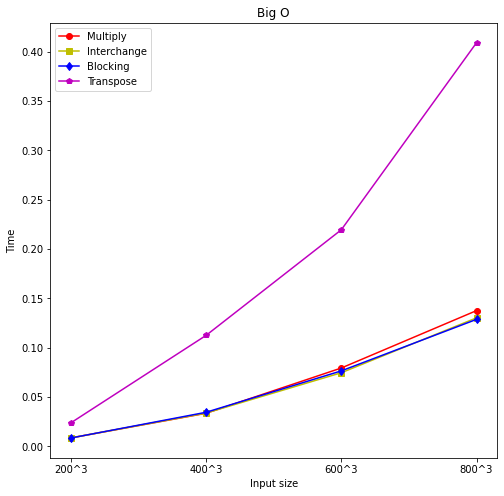

In [39]:
plt.figure(figsize=(8, 8))
plt.plot(list_input, list_time_mul, 'r-o', label='Multiply')
plt.plot(list_input, list_time_mul_inter, 'y-s', label='Interchange')
plt.plot(list_input, list_time_mul_block, 'b-d', label='Blocking')
plt.plot(list_input, list_time_mul_trans, 'm-p', label='Transpose')
#plt.plot(sizes, tos, 'c-o', label='Os')
plt.title('Big O')
plt.xlabel('Input size')
plt.ylabel('Time')
plt.legend()
plt.show()